In [1]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Models
from sklearn.svm import SVC, LinearSVC, LinearSVR
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor

# Evaluation Metrics
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)

# Pipeline
from sklearn.pipeline import make_pipeline


In [2]:
#read pre-processed data 
df = pd.read_csv(r"C:\Users\Ochieng' Oginga\Documents\Post_S\Spring_2025\Data_Science_II\Project\Data\Oginga_Stage4.csv")

#show head 
df.head()

,Name,City,State,Zip,Bank,BankState,ApprovalDate,ApprovalFY,Term,NoEmp,...,Sector_Mining,Sector_Other Services,Sector_Professional Services,Sector_Public Admin,Sector_Real Estate,Sector_Retail Trade,Sector_Transportation,Sector_Unknown,Sector_Utilities,Sector_Wholesale Trade
0,CARVEL,APEX,NC,27502,STEARNS BK NATL ASSOC,MN,7-Feb-06,2006,162,2,...,False,False,False,False,False,True,False,False,False,False
1,SUBWAY,LITTLE ROCK,AR,72223,HOPE FCU,MS,7-Feb-06,2006,126,7,...,False,False,False,False,False,False,False,False,False,False
2,WEYLAND CORPORATION,CAMARILLO,CA,93010,WELLS FARGO BANK NATL ASSOC,SD,7-Feb-06,2006,83,18,...,False,False,False,False,False,False,False,False,False,False
3,CHICAGO BRICK UNLIMITED INC,MIAMI,FL,33186,"CITIBANK, N.A.",FL,7-Feb-06,2006,84,4,...,False,False,False,False,False,False,False,False,False,False
4,"RZI, INC.",NEW ORLEANS,LA,70130,BUSINESS RES. CAP. SPECIALTY B,LA,7-Feb-06,2006,60,3,...,False,False,False,False,True,False,False,False,False,False


### size check 

In [3]:
df.shape

(572333, 46)

### Descriptives 

a) Numeric descriptive statistics

In [28]:
#get description of the data 
df.describe(include='all')


,Name,City,State,Zip,Bank,BankState,ApprovalDate,ApprovalFY,Term,NoEmp,...,Sector_Mining,Sector_Other Services,Sector_Professional Services,Sector_Public Admin,Sector_Real Estate,Sector_Retail Trade,Sector_Transportation,Sector_Unknown,Sector_Utilities,Sector_Wholesale Trade
count,572333,572333,572333,572333.000000,572333,572333,572333,572333.000000,572333.000000,572333.000000,...,572333,572333,572333,572333,572333,572333,572333,572333,572333,572333
unique,503960,26389,51,NaN,4599,55,4907,NaN,NaN,NaN,...,2,2,2,2,2,2,2,2,2,2
top,SUBWAY,LOS ANGELES,CA,NaN,BANK OF AMERICA NATL ASSOC,CA,30-Jan-04,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
freq,937,8412,82707,NaN,68797,78333,981,NaN,NaN,NaN,...,571156,518318,517442,572235,560509,474753,551563,549492,571880,537222
mean,NaN,NaN,NaN,52526.476848,NaN,NaN,NaN,2004.824689,96.625847,8.801560,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,31533.588428,NaN,NaN,NaN,2.982871,70.744067,43.751445,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,1994.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,22480.000000,NaN,NaN,NaN,2003.000000,60.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,54112.000000,NaN,NaN,NaN,2005.000000,84.000000,4.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,83713.000000,NaN,NaN,NaN,2007.000000,102.000000,8.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


i. Summary of numeric variables 

In [29]:
#get summary of the numeric variables 
df.describe()

,Zip,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,DisbursementGross,ChgOffPrinGr,GrAppv,SBA_Appv,ChgOffDate_binary,UrbanRural_binary,MIS_Status_Binary,IsFranchise,LowDoc_binary,RevLineCr_binary
count,572333.000000,572333.000000,572333.000000,572333.000000,572333.000000,572333.000000,572333.000000,5.723330e+05,5.723330e+05,5.723330e+05,5.723330e+05,572333.000000,572333.000000,572333.000000,572333.000000,572333.000000,572333.000000
mean,52526.476848,2004.824689,96.625847,8.801560,1.285879,2.424426,5.958591,1.928716e+05,1.702337e+04,1.785447e+05,1.352192e+05,0.241809,0.183114,0.765161,0.055803,0.074114,0.334014
std,31533.588428,2.982871,70.744067,43.751445,0.453835,13.775755,24.015743,3.094678e+05,7.365140e+04,3.027037e+05,2.487573e+05,0.428179,0.386760,0.423898,0.229541,0.261957,0.471645
min,0.000000,1994.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+03,0.000000e+00,1.000000e+03,5.000000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22480.000000,2003.000000,60.000000,2.000000,1.000000,0.000000,0.000000,3.500000e+04,0.000000e+00,2.500000e+04,1.300000e+04,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,54112.000000,2005.000000,84.000000,4.000000,1.000000,0.000000,2.000000,8.000000e+04,0.000000e+00,6.000000e+04,3.750000e+04,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,83713.000000,2007.000000,102.000000,8.000000,2.000000,2.000000,6.000000,2.000000e+05,0.000000e+00,1.800000e+05,1.275000e+05,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,99999.000000,2014.000000,569.000000,8000.000000,2.000000,5085.000000,9500.000000,1.144632e+07,2.223766e+06,5.472000e+06,5.472000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


ii. Summary for categorical variables 

In [30]:
#summary of categorical variables 
df.describe(include=[object])

,Name,City,State,Bank,BankState,ApprovalDate,DisbursementDate,BalanceGross
count,572333,572333,572333,572333,572333,572333,572333,572333
unique,503960,26389,51,4599,55,4907,2851,14
top,SUBWAY,LOS ANGELES,CA,BANK OF AMERICA NATL ASSOC,CA,30-Jan-04,31-Mar-06,$0.00
freq,937,8412,82707,68797,78333,981,6938,572320


b. Graphical descriptions

i) Histogram for numeric values 


array([[<Axes: title={'center': 'Zip'}>,
        <Axes: title={'center': 'ApprovalFY'}>,
        <Axes: title={'center': 'Term'}>,
        <Axes: title={'center': 'NoEmp'}>],
       [<Axes: title={'center': 'NewExist'}>,
        <Axes: title={'center': 'CreateJob'}>,
        <Axes: title={'center': 'RetainedJob'}>,
        <Axes: title={'center': 'DisbursementGross'}>],
       [<Axes: title={'center': 'ChgOffPrinGr'}>,
        <Axes: title={'center': 'GrAppv'}>,
        <Axes: title={'center': 'SBA_Appv'}>,
        <Axes: title={'center': 'ChgOffDate_binary'}>],
       [<Axes: title={'center': 'UrbanRural_binary'}>,
        <Axes: title={'center': 'MIS_Status_Binary'}>,
        <Axes: title={'center': 'IsFranchise'}>,
        <Axes: title={'center': 'LowDoc_binary'}>],
       [<Axes: title={'center': 'RevLineCr_binary'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

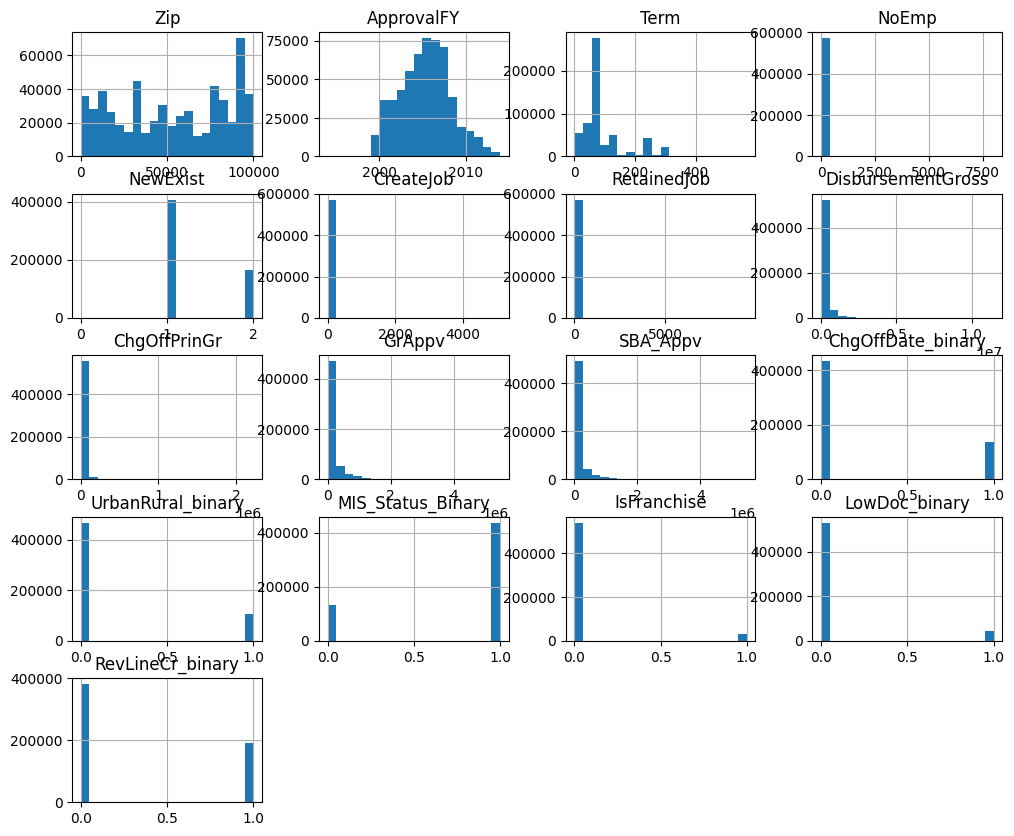

In [6]:
#create a histogram for bumeric variables with bins of 20 
df.hist(figsize=(12, 10), bins=20)

ii. Historgram of Loan approval by year

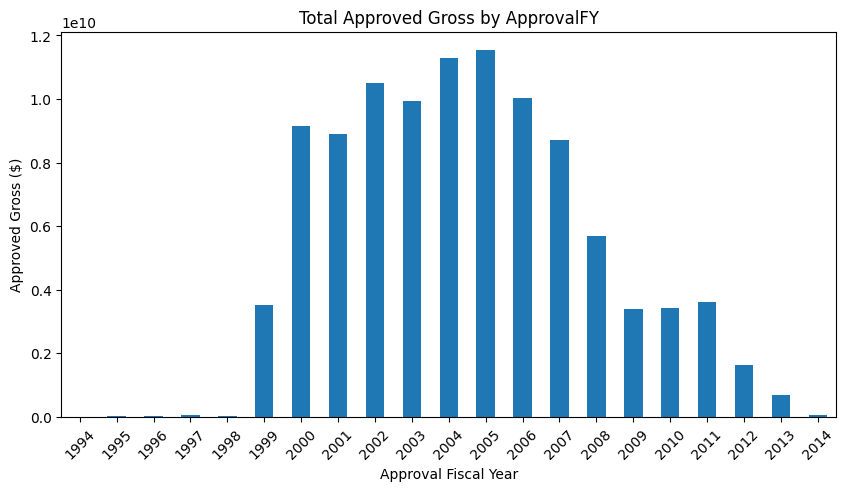

In [7]:
 # Ensure ApprovalFY is numeric
df['ApprovalFY'] = pd.to_numeric(df['ApprovalFY'], errors='coerce')

# Drop any NaN values that might have been introduced during conversion
df = df.dropna(subset=['ApprovalFY'])

# Aggregate and plot
df.groupby('ApprovalFY')['GrAppv'].sum().plot(kind='bar', figsize=(10, 5))

plt.xlabel("Approval Fiscal Year")
plt.ylabel("Approved Gross ($)")
plt.title("Total Approved Gross by ApprovalFY")
plt.xticks(rotation=45)
plt.show()

The peak of loan approval was 2005

iii. Histogram of loan disbursement by year

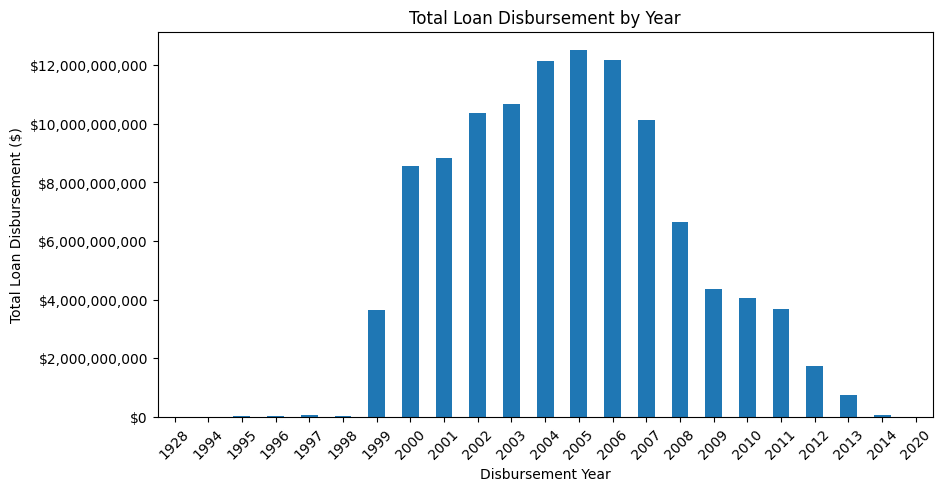

In [8]:
# Extract the last two digits (year) from DisbursementDate and convert to integer
df['DisbursementYear'] = df['DisbursementDate'].str[-2:].astype(int)

# Fix potential century issue: Convert 00-23 to 2000-2023, and 80-99 to 1980-1999
df['DisbursementYear'] = df['DisbursementYear'].apply(lambda x: x + 2000 if x < 24 else x + 1900)

# Aggregate total disbursement by year
yearly_disbursement = df.groupby('DisbursementYear')['DisbursementGross'].sum()

# Plot
fig, ax = plt.subplots(figsize=(10, 5))
yearly_disbursement.plot(kind='bar', ax=ax)

# Formatting
ax.set_xlabel("Disbursement Year")
ax.set_ylabel("Total Loan Disbursement ($)")
ax.set_title("Total Loan Disbursement by Year")
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))  # Format as dollars
plt.xticks(rotation=45)

plt.show()

The peak of loan disbursement year was 2005 matching the year that had the highest loan approval 

Box plots for outliers and distributions 

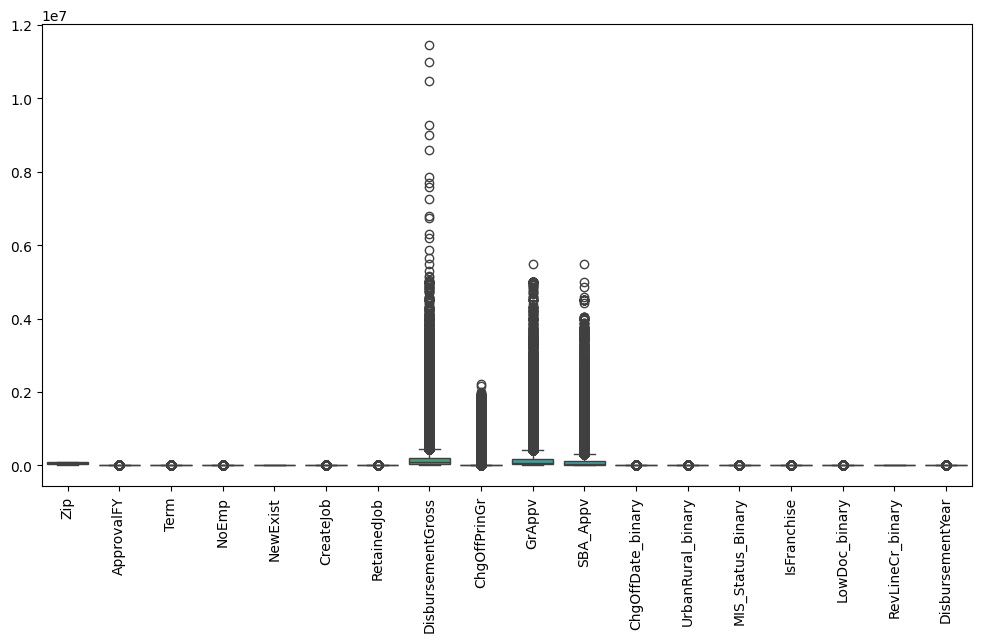

In [9]:
#box plotting
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['number']))
plt.xticks(rotation=90)
plt.show()


Disbursement gross has a six outliers, GrAppc and SBA_appv only have 1 each. The rest of the dataset has no noticeable outliers

Check current columns

In [10]:
#check columns 
df.columns

Index(['Name', 'City', 'State', 'Zip', 'Bank', 'BankState', 'ApprovalDate',
       'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob',
       'DisbursementDate', 'DisbursementGross', 'BalanceGross', 'ChgOffPrinGr',
       'GrAppv', 'SBA_Appv', 'ChgOffDate_binary', 'UrbanRural_binary',
       'MIS_Status_Binary', 'IsFranchise', 'LowDoc_binary', 'RevLineCr_binary',
       'Sector_Accommodation & Food', 'Sector_Admin & Waste Mgmt',
       'Sector_Agriculture', 'Sector_Arts & Recreation', 'Sector_Construction',
       'Sector_Education', 'Sector_Finance', 'Sector_Healthcare',
       'Sector_Information', 'Sector_Management', 'Sector_Manufacturing',
       'Sector_Mining', 'Sector_Other Services',
       'Sector_Professional Services', 'Sector_Public Admin',
       'Sector_Real Estate', 'Sector_Retail Trade', 'Sector_Transportation',
       'Sector_Unknown', 'Sector_Utilities', 'Sector_Wholesale Trade',
       'DisbursementYear'],
      dtype='object')

### size check 

In [3]:
df.shape

(572333, 46)

## 1. Continuous Variables 

### A. Predicting Gross Approved Loan (GrAppv) 

This section uses four models—Logistic Regression, Random Forest, XGBoost, and SVM—to predict the gross approved loan. The target variable is GRAppv.

In [25]:
#set features and target 
features = ['Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'DisbursementGross', 'ChgOffPrinGr', 'SBA_Appv', 
            'ChgOffDate_binary', 'UrbanRural_binary', 'MIS_Status_Binary', 
            'IsFranchise', 'LowDoc_binary', 'RevLineCr_binary',
            'Sector_Accommodation & Food', 'Sector_Admin & Waste Mgmt',
            'Sector_Agriculture', 'Sector_Arts & Recreation', 'Sector_Construction',
            'Sector_Education', 'Sector_Finance', 'Sector_Healthcare',
            'Sector_Information', 'Sector_Management', 'Sector_Manufacturing',
            'Sector_Mining', 'Sector_Other Services', 'Sector_Professional Services',
            'Sector_Public Admin', 'Sector_Real Estate', 'Sector_Retail Trade',
            'Sector_Transportation', 'Sector_Unknown', 'Sector_Utilities',
            'Sector_Wholesale Trade']

X = df[features]
y = df['GrAppv']

#Split into 80% train+val, 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#Split train_val into 87.5% train, 12.5% val ( to achieve 70% train, 10% val)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=42)

i) Linear Regression

Train MSE: 1989391154.14, R²: 0.9783
Validation MSE: 1794591167.47, R²: 0.9802
Test MSE: 1981584865.49, R²: 0.9785


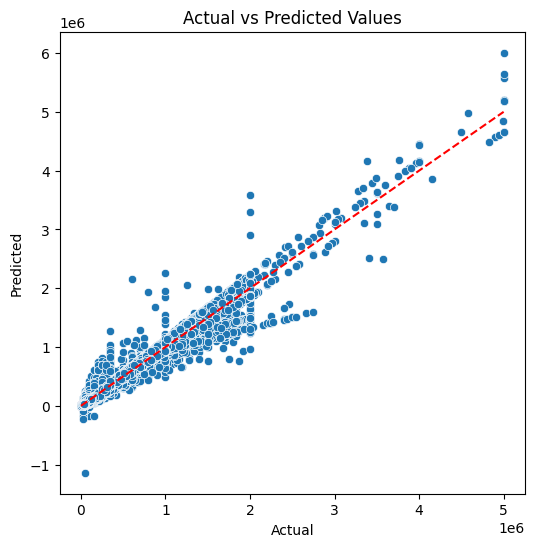

In [26]:
#Scale features for standardization 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Fit Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Predict
y_train_pred = lin_reg.predict(X_train_scaled)
y_val_pred = lin_reg.predict(X_val_scaled)
y_test_pred = lin_reg.predict(X_test_scaled)

# Evaluate
def evaluate(y_true, y_pred, label=""):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{label} MSE: {mse:.2f}, R²: {r2:.4f}")

evaluate(y_train, y_train_pred, "Train")
evaluate(y_val, y_val_pred, "Validation")
evaluate(y_test, y_test_pred, "Test")

#save predictions
y_test_pred_lr = y_test_pred


# Scatter plot of actual vs predicted
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal line
plt.show()

ii) Random Forest 

In [27]:
# Train Random Forest Regressor with scaled data
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    n_jobs=-1,
    random_state=42
)
# Use scaled features
rf_model.fit(X_train_scaled, y_train)  

# Predictions
y_train_pred_rf = rf_model.predict(X_train_scaled)
y_val_pred_rf = rf_model.predict(X_val_scaled)
y_test_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate model performance
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
val_mse_rf = mean_squared_error(y_val, y_val_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)

train_r2_rf = r2_score(y_train, y_train_pred_rf)
val_r2_rf = r2_score(y_val, y_val_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

# Print results
print(f"Random Forest Train MSE: {train_mse_rf:.4f}, R²: {train_r2_rf:.4f}")
print(f"Random Forest Validation MSE: {val_mse_rf:.4f}, R²: {val_r2_rf:.4f}")
print(f"Random Forest Test MSE: {test_mse_rf:.4f}, R²: {test_r2_rf:.4f}")

#save predictions
y_test_pred_rf = rf_model.predict(X_test_scaled)



Random Forest Train MSE: 129422729.8295, R²: 0.9986
Random Forest Validation MSE: 246892299.9305, R²: 0.9973
Random Forest Test MSE: 259425575.0244, R²: 0.9972


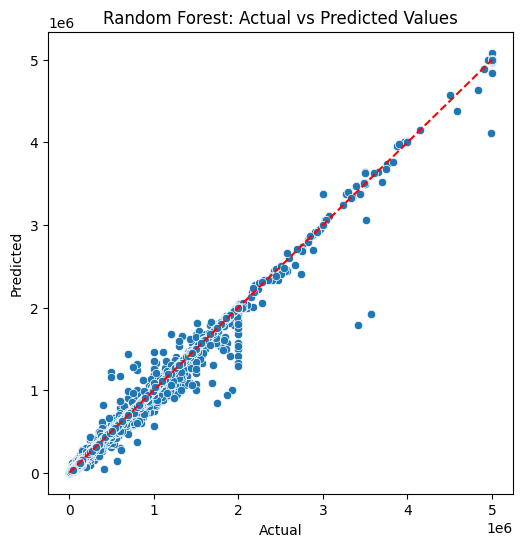

In [28]:
# Scatter plot of actual vs predicted for Random Forest
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_test_pred_rf)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Random Forest: Actual vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal line
plt.show()


iii) XG Boost

In [29]:

# Train XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=50, random_state=42, eval_metric="rmse", n_jobs=-1)
xgb_model.fit(X_train, y_train)

# Predictions
y_train_pred = xgb_model.predict(X_train)
y_val_pred = xgb_model.predict(X_val)
y_test_pred = xgb_model.predict(X_test)

# Evaluate model performance
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print(f"Train MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
print(f"Validation MSE: {val_mse:.4f}, R²: {val_r2:.4f}")
print(f"Test MSE: {test_mse:.4f}, R²: {test_r2:.4f}")


#save predictions
y_test_pred_xgb = xgb_model.predict(X_test)


Train MSE: 1075209796.1439, R²: 0.9883
Validation MSE: 1834541327.1724, R²: 0.9798
Test MSE: 1923854431.4823, R²: 0.9791


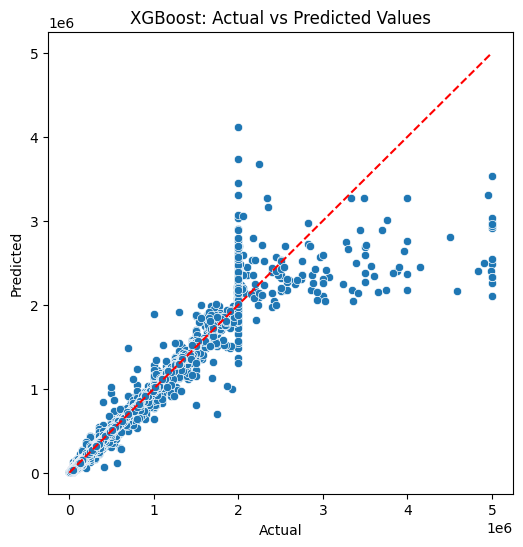

In [30]:
# Scatter plot of actual vs predicted for XGBoost
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("XGBoost: Actual vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal line
plt.show()


iv) Support Machine Vectors 

In [31]:
# Create a pipeline with StandardScaler, PCA, and LinearSVR
svr_pipeline = make_pipeline(
    StandardScaler(),
    PCA(n_components=0.95),  # Retain 95% of variance
    LinearSVR(random_state=42, max_iter=10000)
)

# Fit model on training data
svr_pipeline.fit(X_train, y_train)

# Predictions
y_train_pred = svr_pipeline.predict(X_train)
y_val_pred = svr_pipeline.predict(X_val)
y_test_pred = svr_pipeline.predict(X_test)

# Evaluate model performance
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print(f"Train MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
print(f"Validation MSE: {val_mse:.4f}, R²: {val_r2:.4f}")
print(f"Test MSE: {test_mse:.4f}, R²: {test_r2:.4f}")

#save predictions 
y_test_pred_svr = svr_pipeline.predict(X_test)

Train MSE: 21029628772.2606, R²: 0.7705
Validation MSE: 20930006005.8791, R²: 0.7696
Test MSE: 21209814478.5109, R²: 0.7695


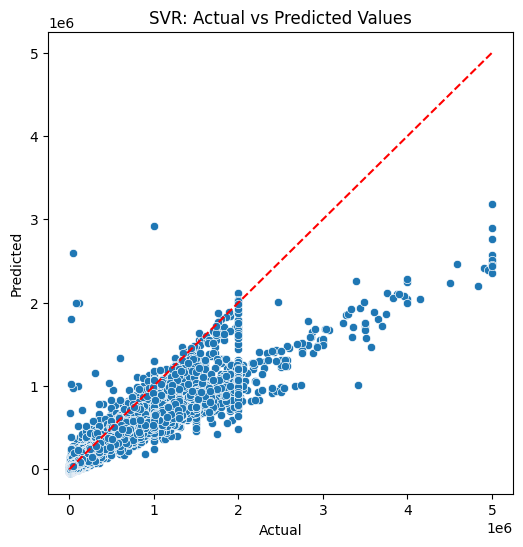

In [32]:
# Scatter plot of actual vs predicted for SVR
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("SVR: Actual vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal line
plt.show()


In [38]:
# Create a dictionary of results
results_apprv = {
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'Linear SVM (10%)'],
    'Train MSE': [1989391154.14, 129422729.8295, 1075209796.1439, 21029628772.2606],
    'Train R²': [0.9783, 0.9986, 0.9883, 0.7705],
    'Val MSE': [1794591167.47, 246892299.9305, 1834541327.1724, 20930006005.8791],
    'Val R²': [0.9802, 0.9973, 0.9798, 0.7696],
    'Test MSE': [1981584865.49, 259425575.0244, 1923854431.4823, 21209814478.5109],
    'Test R²': [0.9785, 0.9972, 0.9791, 0.7695]
}

# Convert to DataFrame
results_df = pd.DataFrame(results_apprv)

# Display it
results_df

,Model,Train MSE,Train R²,Val MSE,Val R²,Test MSE,Test R²
0,Linear Regression,1.989391e+09,0.9783,1.794591e+09,0.9802,1.981585e+09,0.9785
1,Random Forest,1.294227e+08,0.9986,2.468923e+08,0.9973,2.594256e+08,0.9972
2,XGBoost,1.075210e+09,0.9883,1.834541e+09,0.9798,1.923854e+09,0.9791
3,Linear SVM (10%),2.102963e+10,0.7705,2.093001e+10,0.7696,2.120981e+10,0.7695


Random forest and linear regressions were the closest models to match the perfect prediction 

### B. Predicting the Amount of Charged-Off Principal

Understanding what factors contribute to larger charge-offs can help refine lending policies.

In [33]:
df.shape

(572333, 46)

In [37]:
# Define features and target variable
features = ['NoEmp', 'NewExist', 'DisbursementGross', 'GrAppv', 'SBA_Appv', 'UrbanRural_binary', 'MIS_Status_Binary', 
            'IsFranchise', 'LowDoc_binary', 'RevLineCr_binary',
            'Sector_Accommodation & Food', 'Sector_Admin & Waste Mgmt',
            'Sector_Agriculture', 'Sector_Arts & Recreation', 'Sector_Construction',
            'Sector_Education', 'Sector_Finance', 'Sector_Healthcare',
            'Sector_Information', 'Sector_Management', 'Sector_Manufacturing',
            'Sector_Mining', 'Sector_Other Services', 'Sector_Professional Services',
            'Sector_Public Admin', 'Sector_Real Estate', 'Sector_Retail Trade',
            'Sector_Transportation', 'Sector_Unknown', 'Sector_Utilities',
            'Sector_Wholesale Trade']

X = df[features]
y = df['ChgOffPrinGr']

# Split data into 80% train+val and 20% test
X_train_val_prin, X_test_prin, y_train_val_prin, y_test_prin = train_test_split(X, y, test_size=0.20, random_state=42)

# Split train+val into 70% train and 10% val (which is 0.125 of 80%)
X_train_prin, X_val_prin, y_train_prin, y_val_prin = train_test_split(X_train_val_prin, y_train_val_prin, test_size=0.125, random_state=42)


i) Linear Regression as base model 

Train MSE: 3951924938.0516, R²: 0.2622
Validation MSE: 4257093285.2348, R²: 0.2606
Test MSE: 4052395221.0307, R²: 0.2626


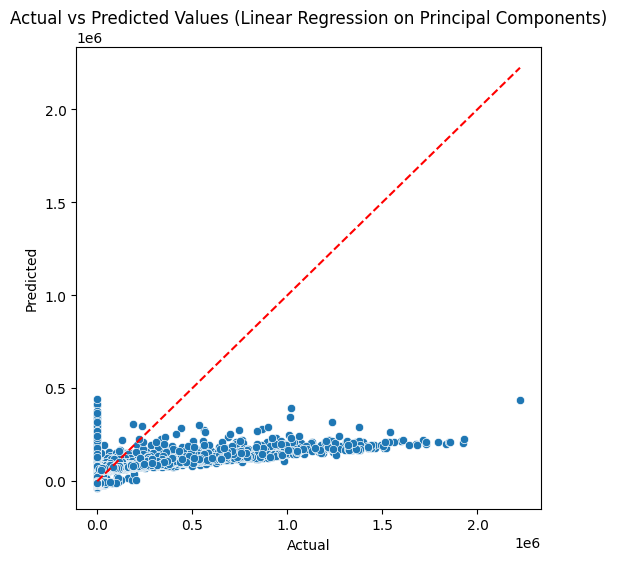

In [39]:
# Standardize the features
scaler_prin = StandardScaler()
X_train_scaled_prin = scaler_prin.fit_transform(X_train_prin)
X_val_scaled_prin = scaler_prin.transform(X_val_prin)
X_test_scaled_prin = scaler_prin.transform(X_test_prin)

# Train Linear Regression model
lr_model_prin = LinearRegression()
lr_model_prin.fit(X_train_scaled_prin, y_train_prin)

# Predictions
y_train_pred_prin = lr_model_prin.predict(X_train_scaled_prin)
y_val_pred_prin = lr_model_prin.predict(X_val_scaled_prin)
y_test_pred_prin = lr_model_prin.predict(X_test_scaled_prin)

# Evaluate model performance
train_mse_prin = mean_squared_error(y_train_prin, y_train_pred_prin)
val_mse_prin = mean_squared_error(y_val_prin, y_val_pred_prin)
test_mse_prin = mean_squared_error(y_test_prin, y_test_pred_prin)

train_r2_prin = r2_score(y_train_prin, y_train_pred_prin)
val_r2_prin = r2_score(y_val_prin, y_val_pred_prin)
test_r2_prin = r2_score(y_test_prin, y_test_pred_prin)

# Print results
print(f"Train MSE: {train_mse_prin:.4f}, R²: {train_r2_prin:.4f}")
print(f"Validation MSE: {val_mse_prin:.4f}, R²: {val_r2_prin:.4f}")
print(f"Test MSE: {test_mse_prin:.4f}, R²: {test_r2_prin:.4f}")

# Plot Actual vs Predicted for test set
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test_prin, y=y_test_pred_prin)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Values (Linear Regression on Principal Components)")
plt.plot([y_test_prin.min(), y_test_prin.max()], [y_test_prin.min(), y_test_prin.max()], 'r--')  # diagonal line
plt.show()


ii) Random Forest 

In [38]:
# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_train_pred = rf_model.predict(X_train)
y_val_pred = rf_model.predict(X_val)
y_test_pred = rf_model.predict(X_test)

# Evaluate performance
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_rmse = np.sqrt(train_mse)
val_rmse = np.sqrt(val_mse)
test_rmse = np.sqrt(test_mse)

train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print(f"Train RMSE: {train_rmse:.4f}, R²: {train_r2:.4f}")
print(f"Validation RMSE: {val_rmse:.4f}, R²: {val_r2:.4f}")
print(f"Test RMSE: {test_rmse:.4f}, R²: {test_r2:.4f}")


Train RMSE: 13003.0535, R²: 0.9684
Validation RMSE: 32454.0521, R²: 0.8171
Test RMSE: 29366.0614, R²: 0.8431


In [40]:
# Train Random Forest model on _prin split
rf_model_prin = RandomForestRegressor(n_estimators=10, random_state=42)
rf_model_prin.fit(X_train_prin, y_train_prin)

# Predictions
y_train_pred_prin = rf_model_prin.predict(X_train_prin)
y_val_pred_prin = rf_model_prin.predict(X_val_prin)
y_test_pred_prin = rf_model_prin.predict(X_test_prin)

# Evaluate performance
train_mse_prin = mean_squared_error(y_train_prin, y_train_pred_prin)
val_mse_prin = mean_squared_error(y_val_prin, y_val_pred_prin)
test_mse_prin = mean_squared_error(y_test_prin, y_test_pred_prin)

train_rmse_prin = np.sqrt(train_mse_prin)
val_rmse_prin = np.sqrt(val_mse_prin)
test_rmse_prin = np.sqrt(test_mse_prin)

train_r2_prin = r2_score(y_train_prin, y_train_pred_prin)
val_r2_prin = r2_score(y_val_prin, y_val_pred_prin)
test_r2_prin = r2_score(y_test_prin, y_test_pred_prin)

# Print results
print(f"Train RMSE: {train_rmse_prin:.4f}, R²: {train_r2_prin:.4f}")
print(f"Validation RMSE: {val_rmse_prin:.4f}, R²: {val_r2_prin:.4f}")
print(f"Test RMSE: {test_rmse_prin:.4f}, R²: {test_r2_prin:.4f}")


Train RMSE: 13003.0535, R²: 0.9684
Validation RMSE: 32454.0521, R²: 0.8171
Test RMSE: 29366.0614, R²: 0.8431


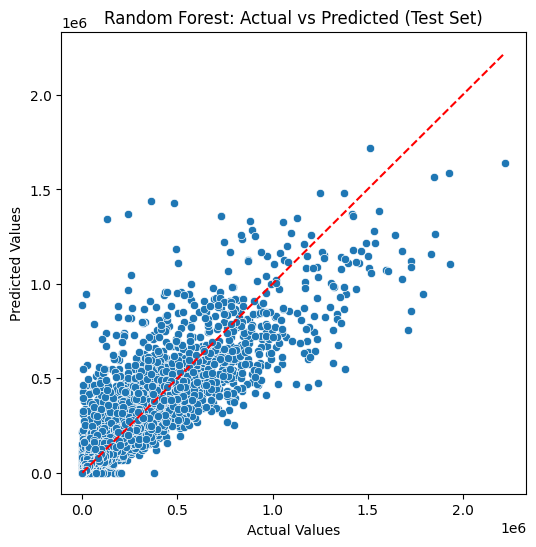

In [41]:
#plot actural versus prediced for train 
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test_prin, y=y_test_pred_prin)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest: Actual vs Predicted (Test Set)")
plt.plot([y_test_prin.min(), y_test_prin.max()],
         [y_test_prin.min(), y_test_prin.max()],
         'r--')
plt.show()


iii) XG Boost

Use XGBoost Regressor because 'ChgOffPrinGr' is a continuous variable 

In [39]:
# Train XGBoost model on _prin split
xgb_model_prin = XGBRegressor(n_estimators=50, random_state=42, eval_metric="rmse", n_jobs=-1)
xgb_model_prin.fit(X_train_prin, y_train_prin)

# Predictions
y_train_pred_prin = xgb_model_prin.predict(X_train_prin)
y_val_pred_prin = xgb_model_prin.predict(X_val_prin)
y_test_pred_prin = xgb_model_prin.predict(X_test_prin)

# Evaluate model performance
train_mse_prin = mean_squared_error(y_train_prin, y_train_pred_prin)
val_mse_prin = mean_squared_error(y_val_prin, y_val_pred_prin)
test_mse_prin = mean_squared_error(y_test_prin, y_test_pred_prin)

train_r2_prin = r2_score(y_train_prin, y_train_pred_prin)
val_r2_prin = r2_score(y_val_prin, y_val_pred_prin)
test_r2_prin = r2_score(y_test_prin, y_test_pred_prin)

# Print results
print(f"Train MSE: {train_mse_prin:.4f}, R²: {train_r2_prin:.4f}")
print(f"Validation MSE: {val_mse_prin:.4f}, R²: {val_r2_prin:.4f}")
print(f"Test MSE: {test_mse_prin:.4f}, R²: {test_r2_prin:.4f}")


Train MSE: 545313973.2197, R²: 0.8982
Validation MSE: 1000066416.2729, R²: 0.8263
Test MSE: 752650245.9733, R²: 0.8630


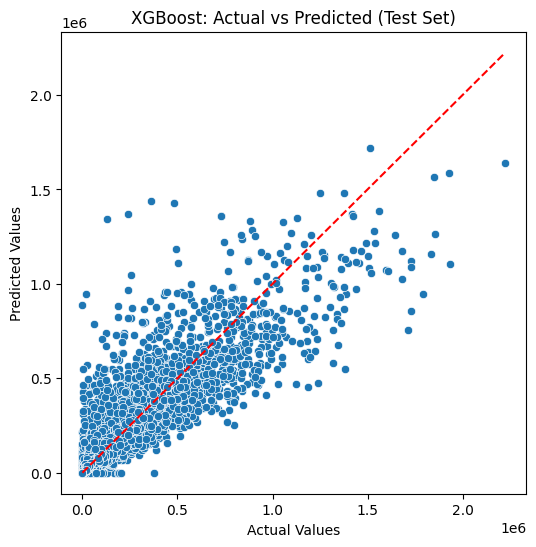

In [42]:
#plot actural vs predicetd reslts
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test_prin, y=y_test_pred_prin)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("XGBoost: Actual vs Predicted (Test Set)")
plt.plot([y_test_prin.min(), y_test_prin.max()],
         [y_test_prin.min(), y_test_prin.max()],
         'r--')
plt.show()


iv) SVM

Since SVM is computationally expensive, I will sub-sample 2% of the dataset and gauge its performance. 

In [43]:
# Subsample 2% of the training data
X_train_sub_prin, _, y_train_sub_prin, _ = train_test_split(X_train_prin, y_train_prin, train_size=0.02, random_state=42, shuffle=True)

# Standardize the features
scaler_prin = StandardScaler()
X_train_sub_scaled_prin = scaler_prin.fit_transform(X_train_sub_prin)
X_val_scaled_prin = scaler_prin.transform(X_val_prin)
X_test_scaled_prin = scaler_prin.transform(X_test_prin)

# Train Linear SVM model (classification — if continuous target, use SVR instead)
svm_model_prin = LinearSVC(max_iter=1000, random_state=42)
svm_model_prin.fit(X_train_sub_scaled_prin, y_train_sub_prin)

# Predictions
y_train_pred_prin = svm_model_prin.predict(X_train_sub_scaled_prin)
y_val_pred_prin = svm_model_prin.predict(X_val_scaled_prin)
y_test_pred_prin = svm_model_prin.predict(X_test_scaled_prin)

# Evaluate model performance
train_mse_prin = mean_squared_error(y_train_sub_prin, y_train_pred_prin)
val_mse_prin = mean_squared_error(y_val_prin, y_val_pred_prin)
test_mse_prin = mean_squared_error(y_test_prin, y_test_pred_prin)

train_r2_prin = r2_score(y_train_sub_prin, y_train_pred_prin)
val_r2_prin = r2_score(y_val_prin, y_val_pred_prin)
test_r2_prin = r2_score(y_test_prin, y_test_pred_prin)

# Print results
print(f"Train MSE: {train_mse_prin:.4f}, R²: {train_r2_prin:.4f}")
print(f"Validation MSE: {val_mse_prin:.4f}, R²: {val_r2_prin:.4f}")
print(f"Test MSE: {test_mse_prin:.4f}, R²: {test_r2_prin:.4f}")


Train MSE: 10889396403.4802, R²: -0.7378
Validation MSE: 11950641000.6477, R²: -1.0756
Test MSE: 11890937938.6569, R²: -1.1637


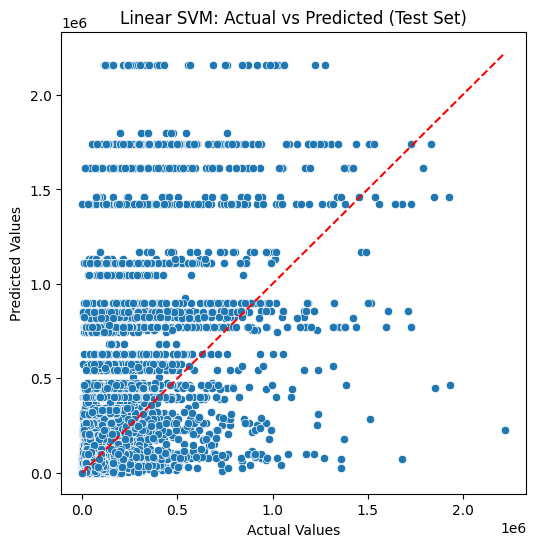

In [44]:
#plot the results 
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test_prin, y=y_test_pred_prin)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear SVM: Actual vs Predicted (Test Set)")
plt.plot([y_test_prin.min(), y_test_prin.max()],
         [y_test_prin.min(), y_test_prin.max()],
         'r--')
plt.show()


### Comparison of Model Performance 

In [10]:
# Create a dictionary of results
results = {
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'Linear SVM (10%)'],
    'Train MSE': [4222554684.93, 13122.5781, 238522649.4237, 10889396403.4802],
    'Train R²': [0.2544, 0.9696, 0.9579, -0.7378],
    'Val MSE': [3914276643.5948, 35667.8978, 1185831992.6504, 11950641000.6477],
    'Val R²': [0.2850, 0.7676, 0.7834, -1.0756],
    'Test MSE': [4280889619.9658, 32811.5325, 1090246310.4710, 11890937938.6569],
    'Test R²': [0.2639, 0.8149, 0.8125, -1.1637]
}

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Display it
results_df


,Model,Train MSE,Train R²,Val MSE,Val R²,Test MSE,Test R²
0,Linear Regression,4.222555e+09,0.2544,3.914277e+09,0.2850,4.280890e+09,0.2639
1,Random Forest,1.312258e+04,0.9696,3.566790e+04,0.7676,3.281153e+04,0.8149
2,XGBoost,2.385226e+08,0.9579,1.185832e+09,0.7834,1.090246e+09,0.8125
3,Linear SVM (10%),1.088940e+10,-0.7378,1.195064e+10,-1.0756,1.189094e+10,-1.1637


The overall best perfomer is XG Boost followed by Random Forest. The poorest perfomer is SVM. There is likelihood that additional performance improvement could be achieved by giving SVM more training data, however, I am not sure if it is worth the compuattional expense given that Random Forest and XGBoost captured 81% of variation in the dataset at a fraction of the computational need. 

### Visual Presentation of Actual vs Multiple Model Predictions 

## May need to be removed if graphing issue is not resolved 

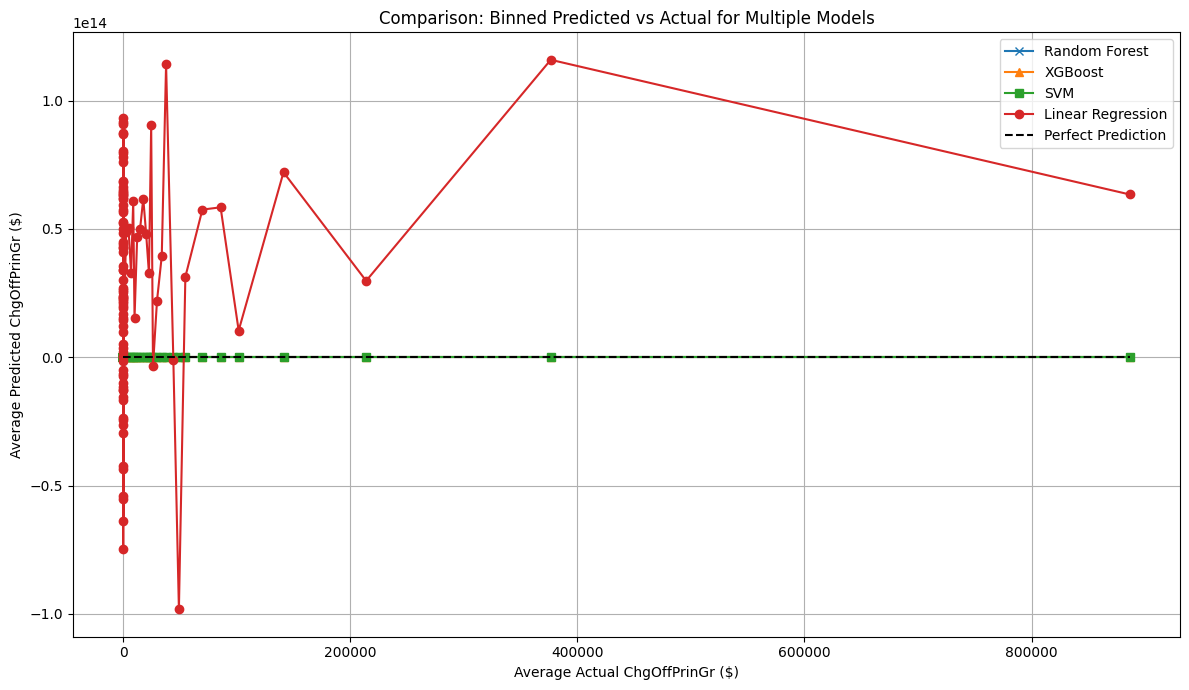

In [8]:
# Get predictions for each model
y_test_pred_rf = rf_model.predict(X_test)                # RandomForestRegressor
y_test_pred_xgb = xgb_model.predict(X_test)              # XGBoost Regressor
y_test_pred_svm = svm_model.predict(X_test_scaled)       # SVM predictions using scaled data
y_test_pred_lr = lr_model.predict(X_test_scaled)         # Linear Regression predictions using scaled data

# Store predictions in a DataFrame
df_plot_multi = pd.DataFrame({
    'Actual': y_test.values,
    'RandomForest': y_test_pred_rf,
    'XGBoost': y_test_pred_xgb,
    'SVM': y_test_pred_svm,
    'LinearReg': y_test_pred_lr
})

# Sort and bin by actual values
df_plot_multi = df_plot_multi.sort_values(by='Actual').reset_index(drop=True)
# Adjust bin size based on your dataset size
bin_size = max(1, len(df_plot_multi) // 100)  # Ensure at least 1 observation per bin
df_plot_multi['bin'] = df_plot_multi.index // bin_size

# Group by bin and compute mean
df_binned_multi = df_plot_multi.groupby('bin').mean()

# Plot
plt.figure(figsize=(12, 7))
plt.plot(df_binned_multi['Actual'], df_binned_multi['RandomForest'], label='Random Forest', linestyle='-', marker='x')
plt.plot(df_binned_multi['Actual'], df_binned_multi['XGBoost'], label='XGBoost', linestyle='-', marker='^')
plt.plot(df_binned_multi['Actual'], df_binned_multi['SVM'], label='SVM', linestyle='-', marker='s')
plt.plot(df_binned_multi['Actual'], df_binned_multi['LinearReg'], label='Linear Regression', linestyle='-', marker='o')

# Perfect prediction line
plt.plot(df_binned_multi['Actual'], df_binned_multi['Actual'], linestyle='--', color='black', label='Perfect Prediction')

# Labels and title
plt.xlabel('Average Actual ChgOffPrinGr ($)')
plt.ylabel('Average Predicted ChgOffPrinGr ($)')
plt.title('Comparison: Binned Predicted vs Actual for Multiple Models')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### C. Job Creation Impact Prediction

This prediction can help  analyze which loans create the most jobs, aiding in economic policy decisions.

In [11]:
df.shape

(572333, 46)

In [51]:
# Take 100% sample of the dataset
#df = df.sample(frac=1, random_state=42)

# Define features and target variable
features = ["DisbursementGross", "Term", 'NoEmp', "NewExist", "UrbanRural_binary", 'RetainedJob', 'ChgOffPrinGr', 'SBA_Appv', 
            'ChgOffDate_binary', 'MIS_Status_Binary', 
            'IsFranchise', 'LowDoc_binary', 'RevLineCr_binary',
            'Sector_Accommodation & Food', 'Sector_Admin & Waste Mgmt',
            'Sector_Agriculture', 'Sector_Arts & Recreation', 'Sector_Construction',
            'Sector_Education', 'Sector_Finance', 'Sector_Healthcare',
            'Sector_Information', 'Sector_Management', 'Sector_Manufacturing',
            'Sector_Mining', 'Sector_Other Services', 'Sector_Professional Services',
            'Sector_Public Admin', 'Sector_Real Estate', 'Sector_Retail Trade',
            'Sector_Transportation', 'Sector_Unknown', 'Sector_Utilities',
            'Sector_Wholesale Trade']
X = df[features]
y = df['CreateJob']

# Split data into 70% train, 10% validation, 20% test
X_train_val_job, X_test_job, y_train_val_job, y_test_job = train_test_split(X, y, test_size=0.20, random_state=42)
X_train_job, X_val_job, y_train_job, y_val_job = train_test_split(X_train_val_job, y_train_val_job, test_size=0.125, random_state=42)


In [52]:
#see the split
print(f"Train set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Train set size: 400632
Validation set size: 57234
Test set size: 114467


1. Linear Regression

Linear Regression:
Train MSE: 143.6146, R²: 0.0519
Validation MSE: 102.7379, R²: -0.0590
Test MSE: 360.3609, R²: 0.0265


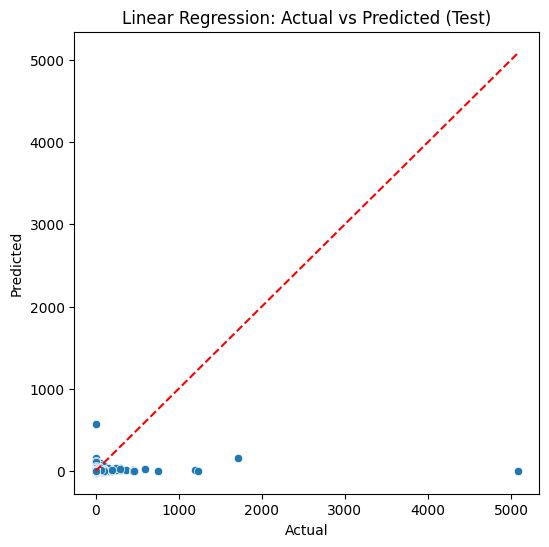

In [53]:
# Train Linear Regression model
lin_reg_job = LinearRegression()
lin_reg_job.fit(X_train_job, y_train_job)

# Predictions
y_train_pred_lin_job = lin_reg_job.predict(X_train_job)
y_val_pred_lin_job = lin_reg_job.predict(X_val_job)
y_test_pred_lin_job = lin_reg_job.predict(X_test_job)

# Evaluate model performance
train_mse_lin_job = mean_squared_error(y_train_job, y_train_pred_lin_job)
val_mse_lin_job = mean_squared_error(y_val_job, y_val_pred_lin_job)
test_mse_lin_job = mean_squared_error(y_test_job, y_test_pred_lin_job)

train_r2_lin_job = r2_score(y_train_job, y_train_pred_lin_job)
val_r2_lin_job = r2_score(y_val_job, y_val_pred_lin_job)
test_r2_lin_job = r2_score(y_test_job, y_test_pred_lin_job)

# Print results
print(f"Linear Regression:")
print(f"Train MSE: {train_mse_lin_job:.4f}, R²: {train_r2_lin_job:.4f}")
print(f"Validation MSE: {val_mse_lin_job:.4f}, R²: {val_r2_lin_job:.4f}")
print(f"Test MSE: {test_mse_lin_job:.4f}, R²: {test_r2_lin_job:.4f}")

# Plot Actual vs Predicted for test data
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test_job, y=y_test_pred_lin_job)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression: Actual vs Predicted (Test)")
plt.plot([y_test_job.min(), y_test_job.max()], [y_test_job.min(), y_test_job.max()], 'r--')  # 45-degree line
plt.show()


2. Random Forest 

In [55]:
# Train Random Forest model
rf_model_job = RandomForestRegressor(n_estimators=10, random_state=42)
rf_model_job.fit(X_train_job, y_train_job)

# Predictions
y_train_pred_rf_job = rf_model_job.predict(X_train_job)
y_val_pred_rf_job = rf_model_job.predict(X_val_job)
y_test_pred_rf_job = rf_model_job.predict(X_test_job)

# Evaluate model performance
train_mse_rf_job = mean_squared_error(y_train_job, y_train_pred_rf_job)
val_mse_rf_job = mean_squared_error(y_val_job, y_val_pred_rf_job)
test_mse_rf_job = mean_squared_error(y_test_job, y_test_pred_rf_job)

train_r2_rf_job = r2_score(y_train_job, y_train_pred_rf_job)
val_r2_rf_job = r2_score(y_val_job, y_val_pred_rf_job)
test_r2_rf_job = r2_score(y_test_job, y_test_pred_rf_job)

# Print results
print(f"Random Forest:")
print(f"Train MSE: {train_mse_rf_job:.4f}, R²: {train_r2_rf_job:.4f}")
print(f"Validation MSE: {val_mse_rf_job:.4f}, R²: {val_r2_rf_job:.4f}")
print(f"Test MSE: {test_mse_rf_job:.4f}, R²: {test_r2_rf_job:.4f}")


Random Forest:
Train MSE: 26.2989, R²: 0.8264
Validation MSE: 105.9432, R²: -0.0921
Test MSE: 386.1715, R²: -0.0432


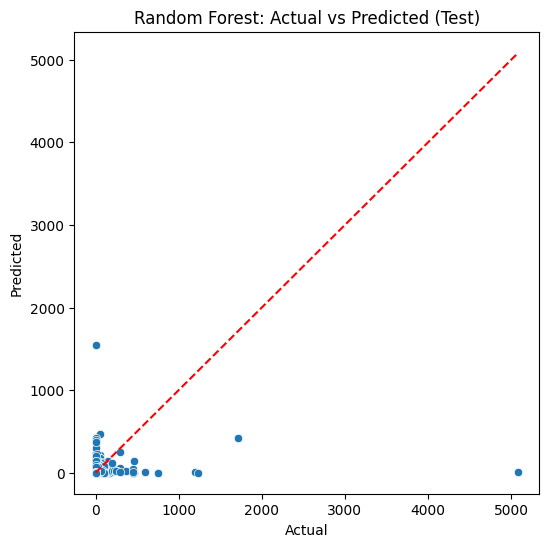

In [56]:
# Plot Actual vs Predicted for Random Forest test data
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test_job, y=y_test_pred_rf_job)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Random Forest: Actual vs Predicted (Test)")
plt.plot([y_test_job.min(), y_test_job.max()], [y_test_job.min(), y_test_job.max()], 'r--')  # 45-degree line
plt.show()


3. XG Boost

Use XGRegressor because 'CreateJob' is a continuous variable.

In [59]:
# Convert target variable to integer type (if it's categorical)
y_train_job = y_train_job.astype(int)
y_test_job = y_test_job.astype(int)

# Check unique classes in train and test sets
print(np.unique(y_train_job))
print(np.unique(y_test_job))

[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   51   52   53   54   55
   56   57   58   59   60   61   62   63   64   65   66   67   68   69
   70   71   72   73   74   75   76   77   78   79   80   81   82   83
   84   85   86   87   88   89   90   91   92   93   95   97   98   99
  100  101  102  103  105  106  108  110  112  115  116  118  119  120
  121  123  124  125  126  128  129  130  131  135  136  137  139  140
  141  143  144  145  148  149  150  152  153  154  155  160  164  165
  167  168  170  174  175  177  180  186  195  200  206  210  220  223
  225  226  235  250  280  300  310  320  350  360  363  375  400  409
  450  451  452  453  454  455  456  457  480  500  569  600  800 1000
 1011 1150 1618 2020 3100]
[   0    1    2    3    4    5    6    7    8    9

Train MSE: 87.5700, R²: 0.4219
Validation MSE: 85.3770, R²: 0.1199
Test MSE: 369.3773, R²: 0.0022


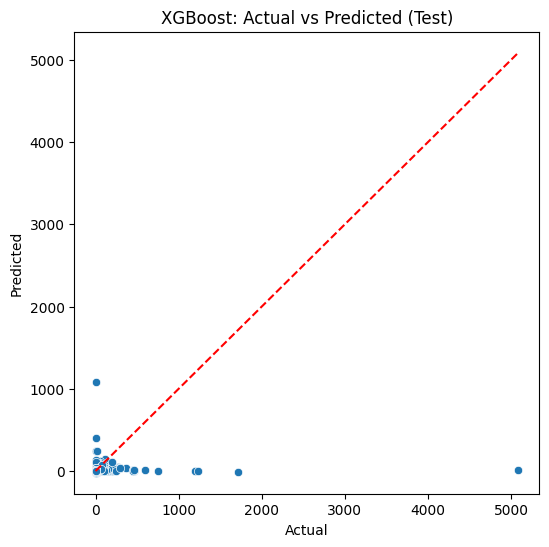

In [63]:
# Train XGBoost model (regression)
xgb_model = XGBRegressor(n_estimators=50, random_state=42)
xgb_model.fit(X_train_job, y_train_job)

# Predictions
y_train_pred_xgb_job = xgb_model.predict(X_train_job)
y_val_pred_xgb_job = xgb_model.predict(X_val_job)
y_test_pred_xgb_job = xgb_model.predict(X_test_job)

# Evaluate model performance
train_mse = mean_squared_error(y_train_job, y_train_pred_xgb_job)
val_mse = mean_squared_error(y_val_job, y_val_pred_xgb_job)
test_mse = mean_squared_error(y_test_job, y_test_pred_xgb_job)

train_r2 = r2_score(y_train_job, y_train_pred_xgb_job)
val_r2 = r2_score(y_val_job, y_val_pred_xgb_job)
test_r2 = r2_score(y_test_job, y_test_pred_xgb_job)

# Print results
print(f"Train MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
print(f"Validation MSE: {val_mse:.4f}, R²: {val_r2:.4f}")
print(f"Test MSE: {test_mse:.4f}, R²: {test_r2:.4f}")

# Plot Actual vs Predicted for XGBoost test data
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test_job, y=y_test_pred_xgb_job)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("XGBoost: Actual vs Predicted (Test)")
plt.plot([y_test_job.min(), y_test_job.max()], [y_test_job.min(), y_test_job.max()], 'r--')  # 45-degree line
plt.show()


In [64]:
df.shape 

(572333, 46)

4. SVM 

Linear SVM:
Train MSE: 115.6478, R²: 0.0350
Validation MSE: 112.4015, R²: -0.1586
Test MSE: 373.9275, R²: -0.0101


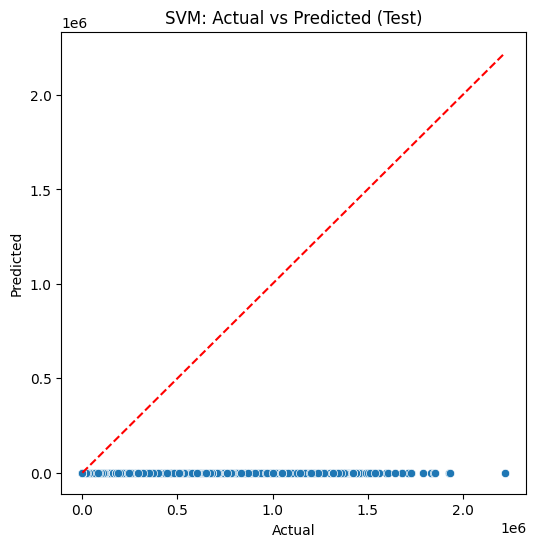

In [65]:
# Subsample 2% of the training data
X_train_sub2_job, _, y_train_sub2_job, _ = train_test_split(X_train_job, y_train_job, train_size=0.02, random_state=42, shuffle=True)

# Standardize the features
scaler_job = StandardScaler()
X_train_sub2_scaled_job = scaler_job.fit_transform(X_train_sub2_job)
X_val_scaled_job = scaler_job.transform(X_val_job)
X_test_scaled_job = scaler_job.transform(X_test_job)

# Train Linear SVM model
svm_model_job = LinearSVC(max_iter=1000, random_state=42)
svm_model_job.fit(X_train_sub2_scaled_job, y_train_sub2_job)

# Predictions
y_train_pred_svm_job = svm_model_job.predict(X_train_sub2_scaled_job)
y_val_pred_svm_job = svm_model_job.predict(X_val_scaled_job)
y_test_pred_svm_job = svm_model_job.predict(X_test_scaled_job)

# Evaluate model performance
train_mse_svm_job = mean_squared_error(y_train_sub2_job, y_train_pred_svm_job)
val_mse_svm_job = mean_squared_error(y_val_job, y_val_pred_svm_job)
test_mse_svm_job = mean_squared_error(y_test_job, y_test_pred_svm_job)

train_r2_svm_job = r2_score(y_train_sub2_job, y_train_pred_svm_job)
val_r2_svm_job = r2_score(y_val_job, y_val_pred_svm_job)
test_r2_svm_job = r2_score(y_test_job, y_test_pred_svm_job)

# Print results
print(f"Linear SVM:")
print(f"Train MSE: {train_mse_svm_job:.4f}, R²: {train_r2_svm_job:.4f}")
print(f"Validation MSE: {val_mse_svm_job:.4f}, R²: {val_r2_svm_job:.4f}")
print(f"Test MSE: {test_mse_svm_job:.4f}, R²: {test_r2_svm_job:.4f}")


# Plot Actual vs Predicted for SVM test data
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_test_pred_svm_job)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("SVM: Actual vs Predicted (Test)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.show()


### Compare Model Performance 

In [24]:
# Create a dictionary of results
results_jobs = {
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'Linear SVM (10%)'],
    'Train MSE': [143.6146, 26.2989, 87.5700, 10889396403.4802],
    'Train R²': [0.0519, 0.8264, 0.4219, 0.0350],
    'Val MSE': [102.7379, 105.9432, 85.3770, 11950641000.6477],
    'Val R²': [-0.0590, -0.0921, 0.1199, -0.1586],
    'Test MSE': [360.3609, 386.1715, 369.3773, 11890937938.6569],
    'Test R²': [0.0265, -0.0432, 0.0022, -0.0101]
}

# Convert to DataFrame
results_df_jobs = pd.DataFrame(results_jobs)

# Display it
results_df_jobs



,Model,Train MSE,Train R²,Val MSE,Val R²,Test MSE,Test R²
0,Linear Regression,1.436146e+02,0.0519,1.027379e+02,-0.0590,3.603609e+02,0.0265
1,Random Forest,2.629890e+01,0.8264,1.059432e+02,-0.0921,3.861715e+02,-0.0432
2,XGBoost,8.757000e+01,0.4219,8.537700e+01,0.1199,3.693773e+02,0.0022
3,Linear SVM (10%),1.088940e+10,0.0350,1.195064e+10,-0.1586,1.189094e+10,-0.0101


### Plotting 

#### Needs REVIEW

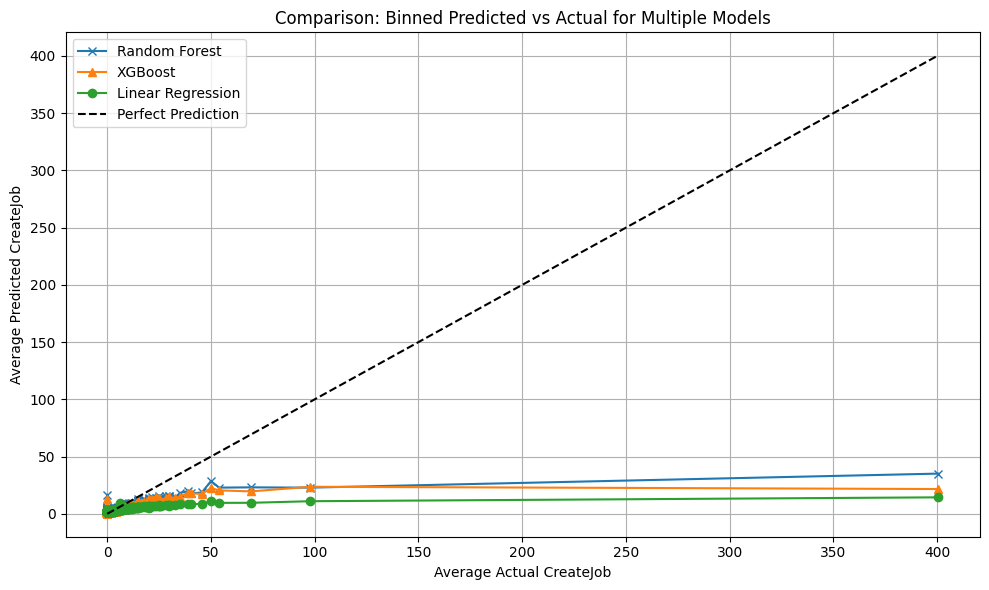

In [21]:
# Predictions for each model
y_test_pred_rf = rf_model.predict(X_test)      # Random Forest Regressor
y_test_pred_xgb = xgb_model.predict(X_test)    # XGBoost Regressor
y_test_pred_lin = lin_reg.predict(X_test)      # Linear Regression

# Store predictions in a DataFrame
df_plot_multi = pd.DataFrame({
    'Actual': y_test.values,
    'RandomForest': y_test_pred_rf,
    'XGBoost': y_test_pred_xgb,
    'LinearReg': y_test_pred_lin
})

# Sort and bin by actual values
df_plot_multi = df_plot_multi.sort_values(by='Actual').reset_index(drop=True)
df_plot_multi['bin'] = df_plot_multi.index // 100  # 100 observations per bin

# Group by bin and compute mean
df_binned_multi = df_plot_multi.groupby('bin').mean()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_binned_multi['Actual'], df_binned_multi['RandomForest'], label='Random Forest', linestyle='-', marker='x')
plt.plot(df_binned_multi['Actual'], df_binned_multi['XGBoost'], label='XGBoost', linestyle='-', marker='^')
plt.plot(df_binned_multi['Actual'], df_binned_multi['LinearReg'], label='Linear Regression', linestyle='-', marker='o')
plt.plot(df_binned_multi['Actual'], df_binned_multi['Actual'], linestyle='--', color='black', label='Perfect Prediction')

# Labels and title
plt.xlabel('Average Actual CreateJob')
plt.ylabel('Average Predicted CreateJob')
plt.title('Comparison: Binned Predicted vs Actual for Multiple Models')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 2. Binary Variables

### A. Predicting loan repayment status 

This section uses four models—Logistic Regression, Random Forest, XGBoost, and SVM—to predict whether a loan issued by banks and guaranteed by the SBA will be paid in full (1) or charged off (0). The target variable is MIS_Status_Binary, where 0 indicates a charged-off loan, and 1 indicates full repayment.

In [14]:
# Define independent variables (features)
features = ['Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'DisbursementGross', 'ChgOffPrinGr', 'SBA_Appv', 
            'ChgOffDate_binary', 'UrbanRural_binary', 
            'IsFranchise', 'LowDoc_binary', 'RevLineCr_binary',
            'Sector_Accommodation & Food', 'Sector_Admin & Waste Mgmt',
            'Sector_Agriculture', 'Sector_Arts & Recreation', 'Sector_Construction',
            'Sector_Education', 'Sector_Finance', 'Sector_Healthcare',
            'Sector_Information', 'Sector_Management', 'Sector_Manufacturing',
            'Sector_Mining', 'Sector_Other Services', 'Sector_Professional Services',
            'Sector_Public Admin', 'Sector_Real Estate', 'Sector_Retail Trade',
            'Sector_Transportation', 'Sector_Unknown', 'Sector_Utilities',
            'Sector_Wholesale Trade']

# Define target variable
X = df[features]
y = df['MIS_Status_Binary']

# Split data into 70% train, 10% validation, 20% test
#first get 20% to be test data 
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
#then split the train data further to have validation set 
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=42)

In [15]:
#see the split
print(f"Train set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Train set size: 400632
Validation set size: 57234
Test set size: 114467


1. Logistic Regression as Baseline Model 

In [17]:
# Standardize the features (Logistic Regression performs better with normalized data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = log_model.predict(X_train_scaled)
y_val_pred = log_model.predict(X_val_scaled)
y_test_pred = log_model.predict(X_test_scaled)

# Evaluate model performance
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
val_precision = precision_score(y_val, y_val_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
val_recall = recall_score(y_val, y_val_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
val_f1 = f1_score(y_val, y_val_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print results
print(f"Train Accuracy: {train_acc:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1: {train_f1:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1: {val_f1:.4f}")
print(f"Test Accuracy: {test_acc:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1: {test_f1:.4f}")


Train Accuracy: 0.9930, Precision: 1.0000, Recall: 0.9909, F1: 0.9954
Validation Accuracy: 0.9929, Precision: 1.0000, Recall: 0.9908, F1: 0.9954
Test Accuracy: 0.9932, Precision: 1.0000, Recall: 0.9911, F1: 0.9955


Confusion matrix 

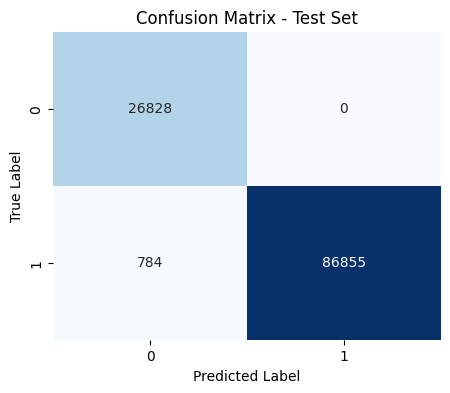

In [18]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Test Set")
plt.show()

2. Random Forest 

In [19]:
# Train Random Forest model with a different variable name
rf_model_MIS = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model_MIS.fit(X_train, y_train)  # Use unscaled X_train
# Predictions
y_train_pred = rf_model_MIS.predict(X_train)
y_val_pred = rf_model_MIS.predict(X_val)
y_test_pred = rf_model_MIS.predict(X_test)

# Evaluate model performance
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
val_precision = precision_score(y_val, y_val_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
val_recall = recall_score(y_val, y_val_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
val_f1 = f1_score(y_val, y_val_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print results
print(f"Train Accuracy: {train_acc:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1: {train_f1:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1: {val_f1:.4f}")
print(f"Test Accuracy: {test_acc:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1: {test_f1:.4f}")


Train Accuracy: 0.9984, Precision: 1.0000, Recall: 0.9979, F1: 0.9990
Validation Accuracy: 0.9926, Precision: 0.9994, Recall: 0.9909, F1: 0.9951
Test Accuracy: 0.9929, Precision: 0.9996, Recall: 0.9911, F1: 0.9953


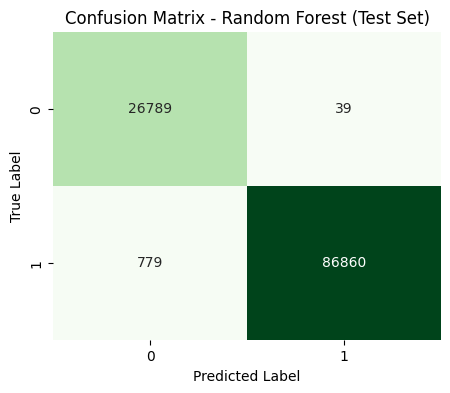

In [20]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest (Test Set)")
plt.show()

3. XG Boost 

In [40]:
# Train XGBoost model
xgb_model = XGBClassifier(n_estimators=50, random_state=42, eval_metric="logloss")
xgb_model.fit(X_train, y_train)

# Predictions
y_train_pred = xgb_model.predict(X_train)
y_val_pred = xgb_model.predict(X_val)
y_test_pred = xgb_model.predict(X_test)

# Evaluate model performance
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
val_precision = precision_score(y_val, y_val_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
val_recall = recall_score(y_val, y_val_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
val_f1 = f1_score(y_val, y_val_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print results
print(f"Train Accuracy: {train_acc:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1: {train_f1:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1: {val_f1:.4f}")
print(f"Test Accuracy: {test_acc:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1: {test_f1:.4f}")


Train Accuracy: 0.9998, Precision: 1.0000, Recall: 0.9994, F1: 0.9997
Validation Accuracy: 0.9998, Precision: 0.9999, Recall: 0.9991, F1: 0.9995
Test Accuracy: 0.9999, Precision: 0.9999, Recall: 0.9996, F1: 0.9997


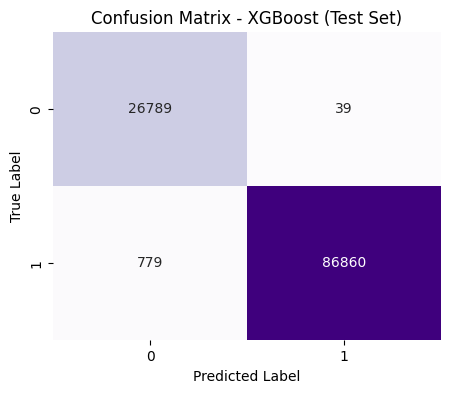

In [21]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - XGBoost (Test Set)")
plt.show()

4. Support Machine Vectors 

Out of the four models, SVM is the worst performer. It has a large MSE and a negative r-squared meaning that it is not the right model for this dataset. 

Logistic regression, Random Forest, and XGBoost all had small MSE, large r-squared, and accuracy clos to 100%. 

In [30]:
# Subsample 2% of the training data
X_train_sub3, _, y_train_sub3, _ = train_test_split(X_train, y_train, train_size=0.02, random_state=42, shuffle=True)

# Scale features
scaler = StandardScaler()
X_train_sub3_scaled = scaler.fit_transform(X_train_sub3)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Train LinearSVC model with scaled data
svm_model = LinearSVC(max_iter=500, random_state=42)
svm_model.fit(X_train_sub3_scaled, y_train_sub3)

# Predictions on scaled data
y_train_pred = svm_model.predict(X_train_sub3_scaled)
y_val_pred = svm_model.predict(X_val_scaled)
y_test_pred = svm_model.predict(X_test_scaled)

# Evaluate model performance
train_mse = mean_squared_error(y_train_sub3, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train_sub3, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_acc = accuracy_score(y_train_sub3, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Print results
print(f"Train MSE: {train_mse:.4f}, R²: {train_r2:.4f}, Accuracy: {train_acc:.4f}")
print(f"Validation MSE: {val_mse:.4f}, R²: {val_r2:.4f}, Accuracy: {val_acc:.4f}")
print(f"Test MSE: {test_mse:.4f}, R²: {test_r2:.4f}, Accuracy: {test_acc:.4f}")

Train MSE: 0.0065, R²: 0.9631, Accuracy: 0.9935
Validation MSE: 0.0071, R²: 0.9607, Accuracy: 0.9929
Test MSE: 0.0069, R²: 0.9617, Accuracy: 0.9931


Confusion matrix

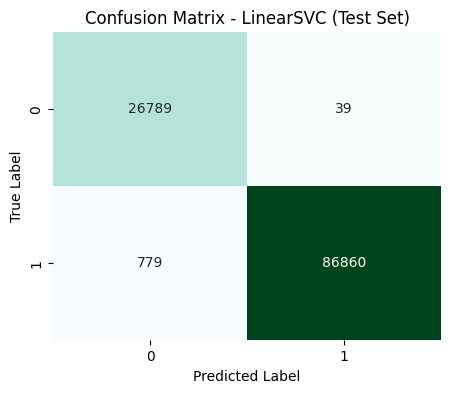

In [22]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="BuGn", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - LinearSVC (Test Set)")
plt.show()

### Compare Model Finance 

In [31]:
#compare model performance 
# Create a dictionary of repayment results
results_repayment = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost', 'Linear SVM'],
    'Train MSE': [0.0070, 0.0016, 0.0070, 0.0065],
    'Train R²': [0.9611, 0.9912, 0.9613, 0.9631],
    'Train Accuracy': [0.9930, 0.9984, 0.9930, 0.9935],
    'Val MSE': [0.0071, 0.0074, 0.0071, 0.0071],
    'Val R²': [0.9608, 0.9587, 0.9608, 0.9607],
    'Val Accuracy': [0.9929, 0.9926, 0.9929, 0.9929],
    'Test MSE': [0.0068, 0.0071, 0.0069, 0.0069],
    'Test R²': [0.9618, 0.9602, 0.9617, 0.9617],
    'Test Accuracy': [0.9932, 0.9929, 0.9931, 0.9931]
}

# Convert to DataFrame
results_df_repayment = pd.DataFrame(results_repayment)

# Display it
results_df_repayment


,Model,Train MSE,Train R²,Train Accuracy,Val MSE,Val R²,Val Accuracy,Test MSE,Test R²,Test Accuracy
0,Logistic Regression,0.0070,0.9611,0.9930,0.0071,0.9608,0.9929,0.0068,0.9618,0.9932
1,Random Forest,0.0016,0.9912,0.9984,0.0074,0.9587,0.9926,0.0071,0.9602,0.9929
2,XGBoost,0.0070,0.9613,0.9930,0.0071,0.9608,0.9929,0.0069,0.9617,0.9931
3,Linear SVM,0.0065,0.9631,0.9935,0.0071,0.9607,0.9929,0.0069,0.9617,0.9931


### B. Loan Default Prediction

Predicting loan defaults can help financial institutions assess risks before issuing loans.

In [24]:
# Define independent variables (features)
features = ['Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'DisbursementGross', 
            'ChgOffPrinGr', 'SBA_Appv', 'UrbanRural_binary', 'MIS_Status_Binary', 
            'IsFranchise', 'LowDoc_binary', 'RevLineCr_binary',
            'Sector_Accommodation & Food', 'Sector_Admin & Waste Mgmt',
            'Sector_Agriculture', 'Sector_Arts & Recreation', 'Sector_Construction',
            'Sector_Education', 'Sector_Finance', 'Sector_Healthcare',
            'Sector_Information', 'Sector_Management', 'Sector_Manufacturing',
            'Sector_Mining', 'Sector_Other Services', 'Sector_Professional Services',
            'Sector_Public Admin', 'Sector_Real Estate', 'Sector_Retail Trade',
            'Sector_Transportation', 'Sector_Unknown', 'Sector_Utilities',
            'Sector_Wholesale Trade']

# Define target variable
X = df[features]
y = df['ChgOffDate_binary']

# Split data into 70% train, 10% validation, 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=42)

In [25]:
#see the split
print(f"Train set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Train set size: 400632
Validation set size: 57234
Test set size: 114467


1. Logistic regression 

In [30]:
# Standardize the features (Logistic Regression performs better with normalized data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = log_model.predict(X_train_scaled)
y_val_pred = log_model.predict(X_val_scaled)
y_test_pred = log_model.predict(X_test_scaled)

# Evaluate model performance
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
val_precision = precision_score(y_val, y_val_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
val_recall = recall_score(y_val, y_val_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
val_f1 = f1_score(y_val, y_val_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print results
print(f"Train Accuracy: {train_acc:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1: {train_f1:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1: {val_f1:.4f}")
print(f"Test Accuracy: {test_acc:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1: {test_f1:.4f}")


Train Accuracy: 0.9977, Precision: 1.0000, Recall: 0.9903, F1: 0.9951
Validation Accuracy: 0.9975, Precision: 1.0000, Recall: 0.9898, F1: 0.9949
Test Accuracy: 0.9977, Precision: 1.0000, Recall: 0.9904, F1: 0.9952


Confusion Matrix

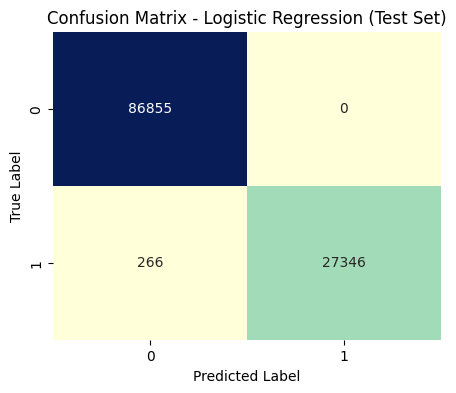

In [31]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression (Test Set)")
plt.show()

2. Random Forest 

In [32]:
# Train RandomForestClassifier model using the already split data
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)  # Use unscaled X_train

# Predictions
y_train_pred = rf_model.predict(X_train)
y_val_pred = rf_model.predict(X_val)
y_test_pred = rf_model.predict(X_test)

# Evaluate model performance
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)
train_precision = precision_score(y_train, y_train_pred)
val_precision = precision_score(y_val, y_val_pred)
test_precision = precision_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
val_recall = recall_score(y_val, y_val_pred)
test_recall = recall_score(y_test, y_test_pred)
train_f1 = f1_score(y_train, y_train_pred)
val_f1 = f1_score(y_val, y_val_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print results
print(f"Train Accuracy: {train_acc:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1: {train_f1:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1: {val_f1:.4f}")
print(f"Test Accuracy: {test_acc:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1: {test_f1:.4f}")

Train Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
Validation Accuracy: 1.0000, Precision: 1.0000, Recall: 0.9999, F1: 1.0000
Test Accuracy: 1.0000, Precision: 1.0000, Recall: 0.9999, F1: 0.9999


Confusion Matrix 

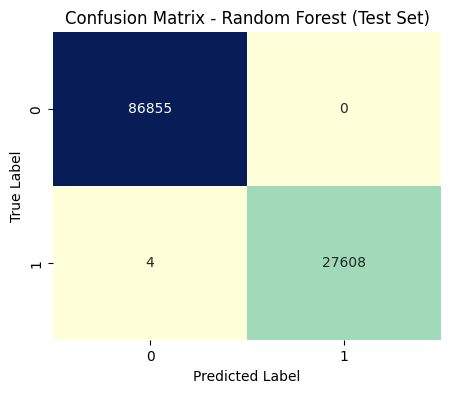

In [33]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest (Test Set)")
plt.show()

3. XGBoost 

In [34]:
# Train XGBoost model (using already split data)
xgb_model = XGBClassifier(n_estimators=50, random_state=42, eval_metric="logloss")
xgb_model.fit(X_train, y_train)

# Predictions
y_train_pred = xgb_model.predict(X_train)
y_val_pred = xgb_model.predict(X_val)
y_test_pred = xgb_model.predict(X_test)

# Evaluate model performance
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
val_precision = precision_score(y_val, y_val_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
val_recall = recall_score(y_val, y_val_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
val_f1 = f1_score(y_val, y_val_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print results
print(f"Train Accuracy: {train_acc:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1: {train_f1:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1: {val_f1:.4f}")
print(f"Test Accuracy: {test_acc:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1: {test_f1:.4f}")

# Confusion Matrix
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Train Accuracy: 0.9998, Precision: 1.0000, Recall: 0.9994, F1: 0.9997
Validation Accuracy: 0.9998, Precision: 0.9999, Recall: 0.9991, F1: 0.9995
Test Accuracy: 0.9999, Precision: 0.9999, Recall: 0.9996, F1: 0.9997
Test Confusion Matrix:
[[86853     2]
 [   12 27600]]


Confusion Matrix

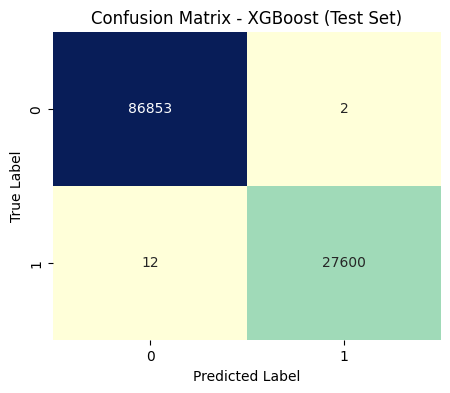

In [35]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - XGBoost (Test Set)")
plt.show()

4. SVM 

In [36]:
# Subsample 2% of the training data
X_train_sub4, _, y_train_sub4, _ = train_test_split(X_train, y_train, train_size=0.02, random_state=42, shuffle=True)

# Standardize features
scaler = StandardScaler()
X_train_sub4_scaled = scaler.fit_transform(X_train_sub4)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Train Linear SVM model
svm_model = LinearSVC(max_iter=1000, random_state=42)
svm_model.fit(X_train_sub4_scaled, y_train_sub4)

# Predictions
y_train_pred = svm_model.predict(X_train_sub4_scaled)
y_val_pred = svm_model.predict(X_val_scaled)
y_test_pred = svm_model.predict(X_test_scaled)

# Evaluate model performance
train_acc = accuracy_score(y_train_sub4, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train_sub4, y_train_pred)
val_precision = precision_score(y_val, y_val_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train_sub4, y_train_pred)
val_recall = recall_score(y_val, y_val_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train_sub4, y_train_pred)
val_f1 = f1_score(y_val, y_val_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print results
print(f"Train Accuracy: {train_acc:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1: {train_f1:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1: {val_f1:.4f}")
print(f"Test Accuracy: {test_acc:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1: {test_f1:.4f}")


Train Accuracy: 0.9960, Precision: 1.0000, Recall: 0.9829, F1: 0.9914
Validation Accuracy: 0.9960, Precision: 0.9999, Recall: 0.9837, F1: 0.9918
Test Accuracy: 0.9960, Precision: 0.9997, Recall: 0.9837, F1: 0.9916


Confusion Matrix 

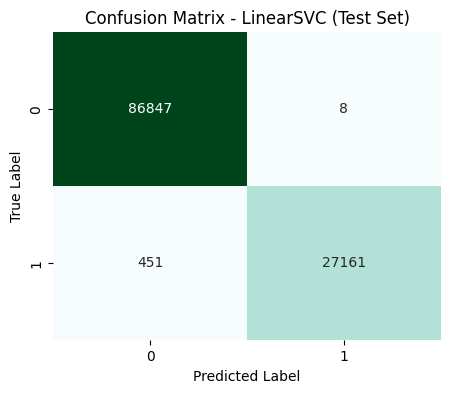

In [37]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="BuGn", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - LinearSVC (Test Set)")
plt.show()
